In [1]:
import gdp_functions as gf

Capabilities vector:
[4.0, 1.0, 8.0, 8.0, 5.0, 2.0, 7.0, 2.0, 7.0, 1.0, 3.0, 8.0, 6.0, 10.0, 5.0, 9.0, 6.0, 8.0, 3.0, 1.0, 5.0, 4.0, 5.0, 8.0, 8.0, 5.0, 3.0, 5.0, 10.0, 3.0]
Alignment vector
[6.0, 5.0, 3.0, 9.0, 4.0, 2.0, 2.0, 7.0, 3.0, 6.0, 4.0, 3.0, 6.0, 3.0, 9.0, 3.0, 5.0, 5.0, 10.0, 6.0, 10.0, 8.0, 7.0, 4.0, 3.0, 9.0, 8.0, 4.0, 3.0, 6.0]
AGI threshold
128.0
Alignment threshold
130.4


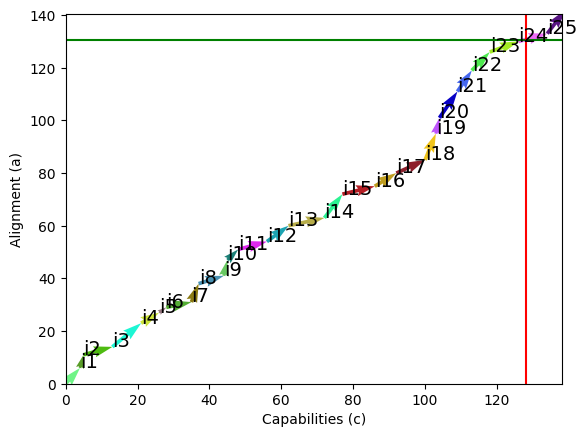

     c   a
1    4   6
2    1   5
3    8   3
4    8   9
5    5   4
6    2   2
7    7   2
8    2   7
9    7   3
10   1   6
11   3   4
12   8   3
13   6   6
14  10   3
15   5   9
16   9   3
17   6   5
18   8   5
19   3  10
20   1   6
21   5  10
22   4   8
23   5   7
24   8   4
25   8   3
26   5   9
27   3   8
28   5   4
29  10   3
30   3   6


In [2]:
# Generate game values 
stages = 30 
df, _, _, c_agi, a_align = gf.genr_game_needs(stages,scale=10)
df = df.astype({'c':'int', 'a':'int'})
# plot all innovations
seq_c, seq_a, _, _ = gf.output_path(list(range(1,stages+1)), df, c_agi, a_align)
gf.plot_innovations(list(range(1,stages+1)),seq_c, seq_a, c_agi, a_align, True)

print(df)


In [3]:
print(df.values.tolist())

[[4, 6], [1, 5], [8, 3], [8, 9], [5, 4], [2, 2], [7, 2], [2, 7], [7, 3], [1, 6], [3, 4], [8, 3], [6, 6], [10, 3], [5, 9], [9, 3], [6, 5], [8, 5], [3, 10], [1, 6], [5, 10], [4, 8], [5, 7], [8, 4], [8, 3], [5, 9], [3, 8], [5, 4], [10, 3], [3, 6]]


In [4]:
def maximize_alignment(innovations, c_thres, max_time):

    """
    Finds the maximum value of a portfolio within a budget constraint.

    Parameters
    ----------
    innovations : numpy.ndarray
        A 2D array of innovations, where each row is an innovation and each
        column is the capabilities and alignment value of the investment.
    c_thres : float
        the capabilities threshold that a strategy needs to confine to

    Returns
    -------
    float
        The maximum alignmebt value followed from the optimal strategy.
    numpy.ndarray
        A 1D array of booleans indicating which innovations are in the optimal
        strategy.
    """
    
    n = len(innovations)
    # Create a 3D array to store the optimal value of the strategies for each possible agi threshold and number of innovations
    dp = [[[0 for _ in range(c_thres+1)] for _ in range(max_time+1)] for _ in range(n+1)]

    # Fill the dp array using a dynamic programming approach
    for i in range(1, n+1):
        for j in range(1, max_time+1):
            for k in range(1, c_thres+1):
                # If the current innovaion fits within the agi threshold and the max time, consider adding it to the strategy
                if innovations[i-1][0] <= k and j > 0:
                    # Check whether adding the innovation to the strategy leads to a higher alignment value
                    dp[i][j][k] = max(dp[i-1][j][k], dp[i-1][j-1][k-innovations[i-1][0]] + innovations[i-1][1])
                else:
                    # If the innovation increases the capabilities above the threshold or time limit then skip it
                    dp[i][j][k] = dp[i-1][j][k]

    # Find the maximum value and the innovations in the optimal strategies
    max_value = 0
    optimal_strategies = []
    for j in range(1, max_time+1):
        for k in range(1, c_thres+1):
            if dp[n][j][k] > max_value:
                max_value = dp[n][j][k]
                num_strategies = j
                optimal_cap_thres = k

    j = num_strategies
    k = optimal_cap_thres
    for i in range(n, 0, -1):
        if dp[i][j][k] > dp[i-1][j][k]:
            optimal_strategies.append(i-1)
            j -= 1
            k -= innovations[i-1][0]

    # Return the results
    return max_value, optimal_strategies, dp

Maximum alignment value: 134
Optimal strategy: [1, 2, 4, 5, 8, 10, 11, 13, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 30]
[1, 2, 4, 5, 8, 10, 11, 13, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 30, 3, 6, 7, 9, 12, 14, 16, 24, 25, 29]
[3, 6, 7, 9, 12, 14, 16, 24, 25, 29]


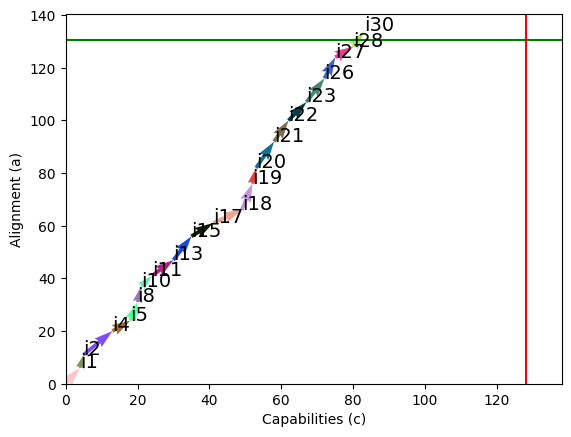

In [11]:
innovations = df.values.tolist()
threshold = int(c_agi)
max_time = 20
max_alignment, optimal_strategy, dp = maximize_alignment(innovations,threshold , max_time)

print("Maximum alignment value:", max_alignment)
print("Optimal strategy:", [i+1 for i in reversed(optimal_strategy)])

# plot optimal strategy 
optimal_strategy = [i+1 for i in reversed(optimal_strategy)]

tmp_list = optimal_strategy + list(set(range(1,stages+1))-set(optimal_strategy))
tmp_list_2 =  list(set(range(1,stages+1))-set(optimal_strategy))

print(tmp_list)
print(tmp_list_2)

seq_c, seq_a, _, _ = gf.output_path(optimal_strategy + list(set(range(1,stages+1))-set(optimal_strategy)), df, c_agi, a_align)


gf.plot_innovations(optimal_strategy,seq_c[0:max_time], seq_a[0:max_time], c_agi, a_align, True)

In [170]:
print(c_agi, a_align)


139.20000000000002 129.6
